In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

import prepare as pr

%matplotlib inline
plt.ion()

# Acquire/Prep

In [2]:
opsd = pr.prep_opsd()
store = pr.store_prep()

In [3]:
opsd.head()

,Consumption,Wind,Solar,month,year,Wind_Solar
Date,,,,,,
2006-01-01,1069.184,0.0,0.0,1,2006,0.0
2006-01-02,1380.521,0.0,0.0,1,2006,0.0
2006-01-03,1442.533,0.0,0.0,1,2006,0.0
2006-01-04,1457.217,0.0,0.0,1,2006,0.0
2006-01-05,1477.131,0.0,0.0,1,2006,0.0


In [4]:
store.head()

,item_id,sale_amount,sale_id,store_id,store_address,store_city,store_state,store_zipcode,item_brand,item_name,item_price,item_upc12,item_upc14,month,day_of_week,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01,1,13.0,1,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,1,Tuesday,10.92
2013-01-01,12,26.0,211817,7,12018 Perrin Beitel Rd,San Antonio,TX,78217,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,1,Tuesday,218.40
2013-01-01,46,27.0,832657,7,12018 Perrin Beitel Rd,San Antonio,TX,78217,Mama Marys,Pizza Sauce,4.65,35457770664,35457770664,1,Tuesday,125.55
2013-01-01,12,54.0,213643,8,15000 San Pedro Ave,San Antonio,TX,78232,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,1,Tuesday,453.60
2013-01-01,12,35.0,215469,9,735 SW Military Dr,San Antonio,TX,78221,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,1,Tuesday,294.00


# Explore

#### Setting Defaults

In [5]:
plt.rc('figure', figsize=(13, 6))
plt.rc('axes.spines', top=False, right=False)
plt.rc('font', size=13)

#### Checking date range

In [6]:
print(f'OPSD data ranges from {opsd.index.min()} to {opsd.index.max()}\nStore data ranges from {store.index.min()} to {store.index.max()}')

OPSD data ranges from 2006-01-01 00:00:00 to 2017-12-31 00:00:00
Store data ranges from 2013-01-01 00:00:00 to 2017-12-31 00:00:00


#### Making series for plotting

In [39]:
s1 = opsd.Consumption
s2 = pd.Series(store.resample('D').sales_total.mean())

### Train/test split
#### OPSD

In [48]:
# Train/test split based on time for OPSD data
train = s1.loc[:'2014']
test = s1.loc['2015':]
train, test

(Date
 2006-01-01    1069.184
 2006-01-02    1380.521
 2006-01-03    1442.533
 2006-01-04    1457.217
 2006-01-05    1477.131
                 ...   
 2014-12-27    1198.834
 2014-12-28    1168.079
 2014-12-29    1316.093
 2014-12-30    1300.367
 2014-12-31    1183.510
 Name: Consumption, Length: 3287, dtype: float64,
 Date
 2015-01-01    1111.33600
 2015-01-02    1300.88400
 2015-01-03    1265.27100
 2015-01-04    1198.85400
 2015-01-05    1449.86100
                  ...    
 2017-12-27    1263.94091
 2017-12-28    1299.86398
 2017-12-29    1295.08753
 2017-12-30    1215.44897
 2017-12-31    1107.11488
 Name: Consumption, Length: 1096, dtype: float64)

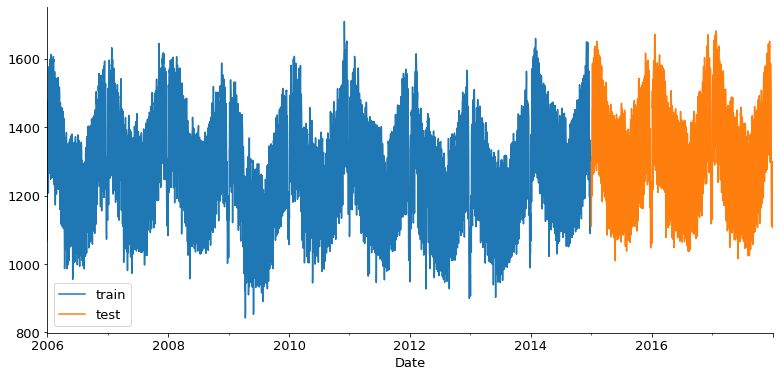

In [49]:
ax = train.plot(label='train')
test.plot(ax=ax, label='test')
plt.legend()

### Train/test split
#### Stores

In [50]:
# Train/test split based on time for Stores data
train = s2.loc[:'2016']
test = s2.loc['2017']
train, test

(sale_date
 2013-01-01    147.68802
 2013-01-02    147.14116
 2013-01-03    156.33896
 2013-01-04    168.93546
 2013-01-05    175.24370
                 ...    
 2016-12-27    207.31578
 2016-12-28    210.62788
 2016-12-29    226.44370
 2016-12-30    240.06728
 2016-12-31    256.01862
 Freq: D, Name: sales_total, Length: 1461, dtype: float64,
 sale_date
 2017-01-01    254.52542
 2017-01-02    170.65996
 2017-01-03    200.77930
 2017-01-04    198.90918
 2017-01-05    215.22760
                 ...    
 2017-12-27    218.30230
 2017-12-28    234.75498
 2017-12-29    253.08368
 2017-12-30    269.80614
 2017-12-31    281.81148
 Freq: D, Name: sales_total, Length: 365, dtype: float64)

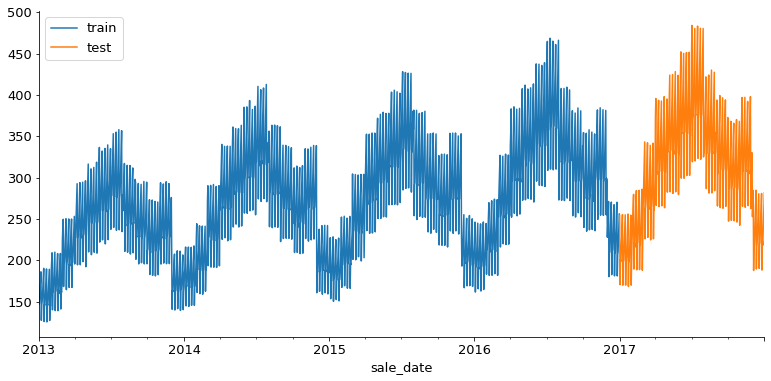

In [51]:
ax = train.plot(label='train')
test.plot(ax=ax, label='test')
plt.legend()